# Machine Learning @ UWr 2023

**Lecture 01**

## What is Machine Learning?

Hello and welcome to the Machine Learning (ML) 2023 class!

- Before we begin to learn all the tiny details about ML models, let's first understand where ML can be used.


- As its name suggests, ML describes ways in which a Machine, that is a computer, learns, or in other words discovers how to solve a problem that we supply to it.


- What does it mean?


- Usually, when we want the computer to solve a task, we must first come up with an algorithm, that is with a sequence of simple operations that will accomplish the task at hand. Then, we implement the algorithm using our programming language of choice. The computer executes our algorithm - precisely and tirelessly, but without any will of its own.


- ML is also about solving tasks, however we define these with _data_: instead of describing to a computer what it _must do_ to solve a task, we supply it with examples of task. The machine then has to find a procedure that will match our examples.


This will become clearer with a few examples.

### Example: Computer Vision

Consider these two superficially [similar problems](https://xkcd.com/1425/):
1. In-Out: given an image of a rectangle, determine if a point is inside, or outside of it
2. Bird-Spotting: given a photograph, tell if it contains a bird

Think how you could solve them!

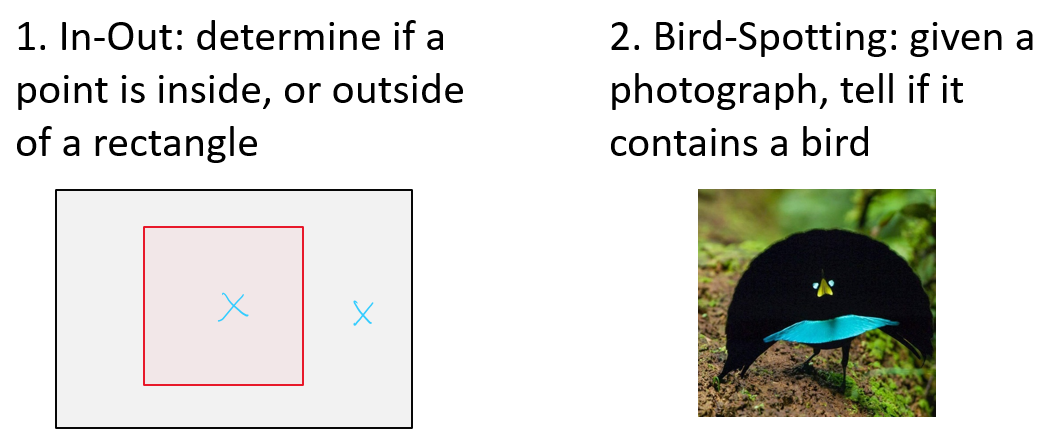

#### In-Out: the algorithmic task
The first problem can be rigorously defined: the input is grid of pixels, with a known size. Some of the pixels (the rectangle's boundary) are black, there is exactly one blue pixel (the query point), each black pixel has two black neighbors (out of 4), seen as a graph of pixels the two black pixels separate the white ones into two connected components, etc. These formally defined properties of input images allow formulation of algorithms: we could, for instance, start coloring pixels neighboring the query pixel until we reach the border of the rectangle, which we do not cross. When we have stopped coloring pixels, the query point is:
- inside the rectangle if we didn't reach the image's border
- outside the rectangle if we did reach it.
Some other solution might look at the coordinates of the rectangle's edges, then use linear algebra to test on which side of the edges the query point and use it to tell on which side is the query pixel.

This is an algorithmic problem: we can formally define all entities we will be dealing with, then write down the solution as a sequence of simple steps. Our solution will return the correct result for any valid input image, and we can precisely tell when an image is valid.

#### Bird-spotting: the ML task
On the other hand, the second problem is only superficially similar to the first: the input to the program is again an image, or a grid of pixels. However, we can't easily formalize any more of its properties: for instance, what does it mean that the pixels show a photograph (How to define a photograph? Does it matter if someone inputs a drawing? Can it be grayscale? Can it be altered?)? The task of finding the bird is also difficult to specify:
- We could e.g. define the bird as a contiguous part of the image, which also contains feathers, wings, a beak... However, then we must define the bird-body parts. 

As you can see, we can't easily create a rigorous definition for this problem. Yet, paraphrasing the infamous [encyclopedia](https://en.wikipedia.org/wiki/Nowe_Ateny) "a bird is as everyone can see". Thus while we can't formally define our task, we can produce millions of examples that demonstrate the intended behavior. We will call them a *dataset*.


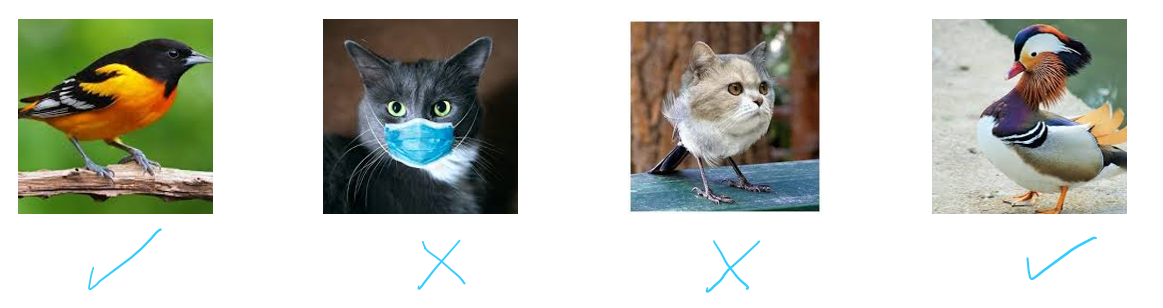

The introduction of the dataset is liberating, suddenly we can use it to formulate claims about our model's intended, or actual behavior, such as:
- the model correctly classifies 95% of samples _in the dataset_
- the model correctly classifies 80% of samples _in a similar dataset, not used for model construction_

Finally, our task becomes less abstract: given the dataset of examples, namely pairs of inputs and outputs, write a computer program that will work in a similar way on new examples similar to the ones in the original dataset. 

## ML and behavioral imitation

To formalize the Bird-spotting task we had to introduce a dataset of images, each annotated with a binary label indicating the presence of a bird in it. If fact, it is this dataset which defines our task:

> The Bird-spotting task is to find a program that returns with *high probability* the correct label when applied to images like the ones in the dataset.

Let us stress it as the main difference and characteristic between machine learning tasks and non-machine learning tasks: 
<p>
<center><b>a machine learning problem is specified by the dataset</b></center>


The dataset also allows us to formulate algorithms that solve the task. We could for instance:
- Compare a query (or test) image to the ones in our dataset, find the most similar and return its label.

Thus, in the ML view of the world there are two processes:
1. The data generating process, e.g. `photographs -> human labelers -> yes/no labels`.
2. The ML solution, which mimics the behavior of the data generating process.


Roughly speaking, **we always need data or a subset of data that we know is exactly what we are searching for** --- e.g., as in the image recognition, we need to know upfront which images represent a cat. This statement is surely the case in the *supervised* learning. However, one can argue that in the unsupervised learning it's also the case. We will ilustrate somehow this point quite soon, when we shall talk about kMeans algorithm.

### Predictions and Generalization

A ML model thus uses data during two steps:
1. model creation (also called training), when it uses the data to approximate the relation in it
2. model evaluation, when it uses the data to make claims about its quality.


- Obviously, simply remebering all datapoints trivially makes a model 100% accurate on the data it has remembered. However, our end goal is to do well on new data, that will be similar, 
- but not identical to the dataset used to create the model.

Thus, the two uses of data usually necessitate the creation of two datasets:
1. a **training dataset** is used to construct a model
2. a **testing dataset** is used to evaluate a given model

Training and testing datasets must be *similar*, but not identical: we want the model to find a solution which can **generalize** from the train set, to the test set.


### Statistics and probability

So far we've already used words "high probability", when saying that a program should give a good answer on a dataset with high probability. But what does it even mean? The dataset is just given, and where is the randomness there? 

Also, we have said that the training and testing datasets should be similar. But again, what does it mean? 

Both questions touch on one of the most important assumptions underlying basically all of the machine learning problems. Namely, that 
<center><b>every datasample we have is being drawn from a global probability distribution of possible datasamples</b>.</center>
This also explains, why some methods you will see in this lecture are sometimes called also not machine learning but statistical learning. 

We will elaborate on this in couple of lectures from now.

## What is a "model"?


## Summary

In conclusion, Machine Learning deals with tasks for which the intended behavior is specified using a testing/evaluation dataset and for which a solution is created by observing patterns of behavior occurring in a training dataset.

Let me restate it: the datatset is the very problem definition. Claims like "my model is 90% good at doing XYZ" are moot unless they refer to a dataset on which they were obtained. In ML data is like code: it drives and defines model's behavior.

#### Bird-spotting continued

Let us continue the Bird-spotting example. You want to follow a [leading cellphone's manufacturer](https://www.phonearena.com/news/Is-the-Moon-Mode-on-the-Huawei-P-30-Pro-faking-parts-of-photographs_id115554) and make an app which "enhances" bird's photos your user may take to look like [Dodo](https://en.wikipedia.org/wiki/Dodo). After all, pics or it didn't happen! Your first step is to define a dataset that will be used to detect enhanceable birds in the pictures.

First, you collect a dataset which will define the functionality of your model. It has to reflect the intended use, for instance it should have many different birds in different situations (some flying, some standing, with varied backgrounds and lightning conditions etc). This step is important failure to miss a mode may cause [many](https://eu.usatoday.com/story/tech/2015/07/01/google-apologizes-after-photos-identify-black-people-as-gorillas/29567465/) [failures](https://www.washingtonpost.com/graphics/2018/business/alexa-does-not-understand-your-accent/).

You may want to split this data into two halves: you will call one your *development* or *validation* dataset use one to develop some ML models. The second one will be used only once, for a final evaluation. Equivalently, you could decide to collect a new test set in the future and use it for the final evaluation. This split will limit fitting you models too much to the testing data.

You then define some measures of goodness of your model: e.g. it is fine if it occasionally misses a bird, but it is bad if it mistakes a different animal for a bird. This gives you an evaluation function.

Finally, you collect data on which you will build your model: these can be different pictures of birds, but nowadays it is common to also use less related data - like other natural images, generated images, or artificially augmented ones. As long as adding such data improves your evaluation metric on the target data, it is fine. However please note that while practitioners often allow for a slight training-testing data mismatch and are more concerned with the final result, all the theoretical analysis we will do requires that training and testing data comes from exactly the same generating process.

You then build the model. This usually involves a search over different implementations of functions that will map the images to yes/no labels in a way similar to the training data. This step is called training the model.

## Simple example of what we have said so far

Let's look at the problem of detecting which digit is represented in an image of a handwritten digit. 
Let's use for this purpose one of the most known datasets there is, i.e., MNIST.

In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From (original): https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
From (redirected): https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU&confirm=t&uuid=889b7e32-430a-42ab-913f-a4cf94e252bf
To: /mnt/c/Users/jakub/programowanie/school/ml/Lectures/mnist.npz
100%|██████████████████████████████████████| 55.4M/55.4M [00:00<00:00, 76.1MB/s]


In [2]:
import numpy as np
with np.load('mnist.npz') as data:
    X_train = data['train_data'][:1000]
    y_train = data['train_labels'][:1000]
    X_test = data['train_data'][1000:1500]
    y_test = data['train_labels'][1000:1500]

**X_train** is the set which will be used by our algorithm to give the answers. **y_train** represents the actual answers. Look:

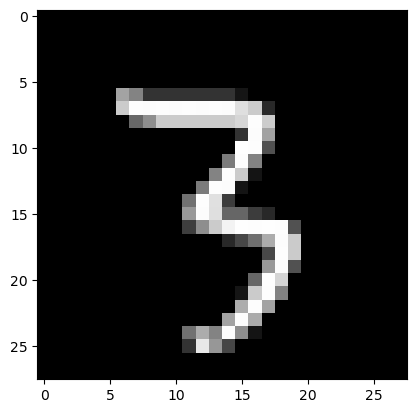

Label: 3


In [3]:
import matplotlib.pyplot as plt
fig = plt.figure
plt.imshow(X_train[44], cmap='gray')
plt.show()
#and the according label is
print("Label:", y_train[44])

The simplest possible machine learning algorithm is the so-called k-Nearest Neighbor algorithm. We will cover it in the next lecture. For now, let us just see how does a basic procedure of using it look like.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train.reshape(-1,28*28), y_train) 
#the reshape operator is just something we need to use for the of the shelf kNN algorithm to work
#don't worry about it for now


KNeighborsClassifier(n_neighbors=10)

In [6]:
y_train_pred = model.predict(X_train.reshape(-1,28*28))
y_train_pred[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])

In [7]:
(y_train_pred == y_train).mean()

0.883

So we got the classification decisions of our algorithm on the dataset which was used to drive the algorithm.
Out of 5000 thousand examples, the algorithm manages to classify $97\%$ properly.
However, we don't really know how good the algorithm will be on data which it didn't use for training (the *fit* method) --- and that's why we need to use the **X_test, y_test** dataset.

In [8]:
y_test_pred = model.predict(X_test.reshape(-1,28*28))
y_test_pred[:20]

array([0, 7, 1, 1, 4, 9, 4, 3, 4, 8, 2, 2, 1, 9, 9, 0, 8, 1, 0, 4])

In [9]:
(y_test_pred == y_test).mean()

0.852

The classification decisions of the algorithm are solely based on the dataset **X_train, y_train**. 
Yet, it has a reasonably high accuracy, i.e., $94.4\%$, of detecting the actual digit on images from **X_test** which have not be seen by the algorithm. On top of that **X_test** consists of 1000 images, so we cannot say it's merely a coincidence which would be a good argument if the size of **X_test** would be very small, e.g., 1.
This makes us believe a little bit more in the correctness of our model.

## Taxonomy of learning scenarios

As we have seen, Machine Learning concerns itself with building models which capture some properties of a given dataset.

### Supervised Learning
In **Supervised Learning** the data consists of pairs of inputs and the desired outputs.

#### Classification

We speak about *classification* problems when the desired outputs belong to a small set, e.g.: telling if the picture contains a bird (targets are binary), classifying the bird species and similar.

One classical example of supervised learning is the [iris flower classification problem](https://en.wikipedia.org/wiki/Iris_flower_data_set). This dataset, popularized by sir Ronald Fisher contains measurements of the petals and sepals of iris flowers along with their species.

Typically, the goal is to predict the species, given the measurements. Thus it is a supervised classification problem.

Technical side-note: In the code below we will format the data as a `pandas.DataFrame` structure, you will learn more about it working on the first assignment, if you are unfamilar with Pandas you can think about a DataFrame as of a table containing rows of data.

In [10]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Categorical(iris.target_names[iris.target])
iris_df.loc[[0,1,50,51,100,101]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [11]:
iris_df.shape  # This tells us the number of rows and columns in the data

(150, 5)

We can see that the Iris data contains 150 measurements, each containing four _features_ of flowers, and a single _target_ taking one of three possible values.

We can thus build classification models which predict the target class and are scored using the accuracy, i.e. the fraction of correct answers given by the model.


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

#### Regression

However, we could use the Iris dataset to solve a different task, for instance predict the `petal width` from `petal length`.
This is is still a supervised task, however this time the target is numeric. This is a **regression** task and typical quality measures
tell how far are the predictions of the model from the ground truth values. For instance we can compute a mean of the errors squared.

#### Other types of supervised learning

Many other supervised tasks exist beyond classification and regression. For instance, sentence parsing in which we map sentences to parse trees is an example of a structural prediction task. Similarly, translation or speech recognition are sometimes called sequence-to-sequence task, because they consist of mapping a sequence of words or sounds to another sequence.

### Unsupervised learning

Sometimes, we are not interested in learning a features-target relation, but want to learn more about the structure of the data itself.

We speak then about *unsupervised* learning - there is no predefined tasks, no input-output supervision. Instead, we can try to:
- better understand the data, often through visualizations: this is often called _exploratory data analysis_;
- divide the data into groups, then we speak about _clustering_. For instance an online shop may try to cluster its customers into groups that could be offered different promotions;
- embed or project the data in low dimensional spaces, such that some salient properties are preserved. This is called dimensionality reduction and is often a prerequisite for data visualization;
- extract some derived quantities from the data, often called _learned features_ which will serve as inputs to other tasks;
- learn to generate new data.

Unsupervised learning is fundamentally harder than supervised learning because there is no default task that can be solved and used for performance evaluation. Rather, we must find tasks that would improve our understanding, or make future, (also called downstream) machine learning tasks easy.

Below we present examples of unsupervised learning tasks.

#### Exploratory analysis

Before we start building models for data, we must understand the nature of it - what do the features represent, what range of values do they span, are they correlated with the other ones, etc.

Quite often very basic plots are helpful. Below, we make a _pairplot_ which shows data correlations. We can notice that `petal length` and `petal width` are correlated and a model may probably use one or the other. We also see that combining petal and sepal lengths can yield decent iris species classifiers.

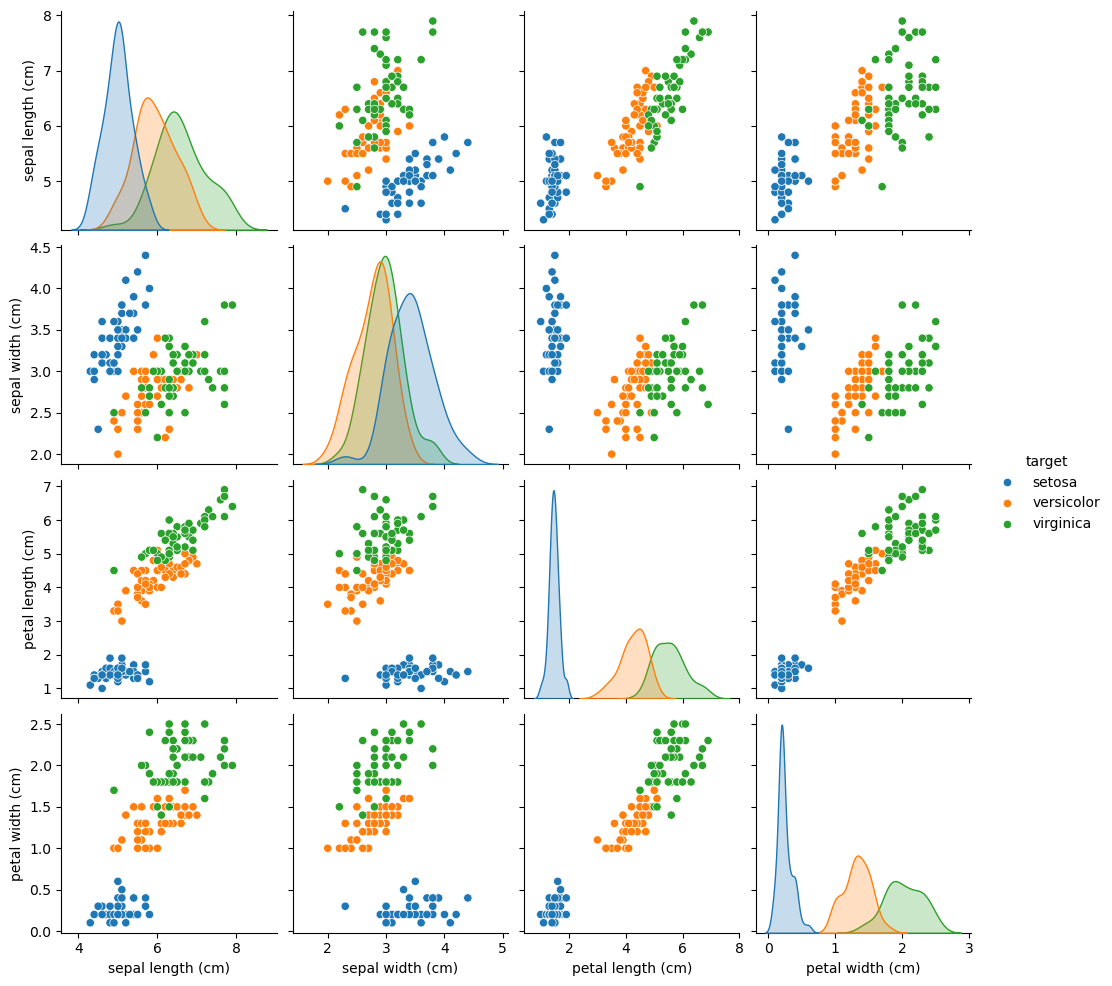

In [13]:
sns.pairplot(iris_df, hue='target')

#### Data clustering

Below we apply a very basic algorithm to divide the data into four groups. Please note, that the procedure has no access to the `target` column - it has to produce a grouping based on flower measurements alone.

In [14]:
import sklearn.cluster

iris_cluster = pd.Categorical(
    sklearn.cluster.KMeans(n_clusters=4).fit_predict(
    iris_df[iris.feature_names]))

Text(0.5, 1.0, 'Ground truth classes')

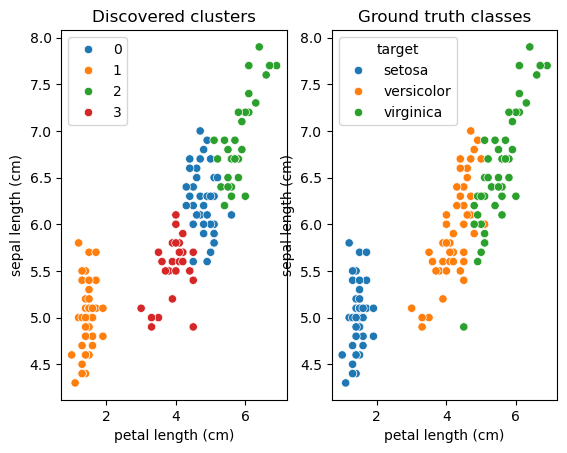

In [15]:
plt.subplot(121)
sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal length (cm)', hue=iris_cluster)
plt.title("Discovered clusters")

plt.subplot(122)
sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal length (cm)', hue='target')
plt.title("Ground truth classes")

Please note, how the clusterer has correctly discovered that the setosa irises are very different from versicolors and virginicas. There are two other clusters which contain only versicolor or virginca flowers, however there is also a fourth cluster containing points on the boundary between versicolors and virginicas. Please note however, that the results would have been different if we asked for a different number of clusters.

#### Data projections and embeddings

Finally, we will project the Iris data into two dimensions. It may seem artificial for such a small dataset as Iris, but low dimensional embeddings are often the only way to visualize complex datasets.


We will first demonstrate a PCA (principal components analysis) projection. We will learn all about it during a future lecture, for now intuitively it solves the problem of linearly projecting the data into 2D such that maximal spread of the data is preserved

Text(0.5, 0, '2nd PCA component')

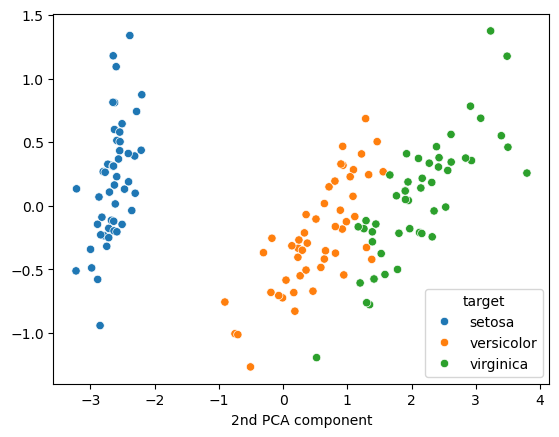

In [16]:
import sklearn.decomposition

iris_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(iris_df[iris.feature_names])

sns.scatterplot(x=iris_2d[:,0], y=iris_2d[:,1], hue=iris_df.target)
plt.xlabel('1st PCA component')
plt.xlabel('2nd PCA component')

It can be seen that PCA has selected a projection in which the 3 classes can be roughly separated, even though it did
not have access to the target class.

Then, we will construct a t-SNE embedding of the Iris data in 2D. This model tries to place each datapoint in 2D space such that neares neighbors are preserved. We see that this data visualization stresses the difference of setosas from the two other Iris species.

Text(0.5, 0, '2nd PCA component')

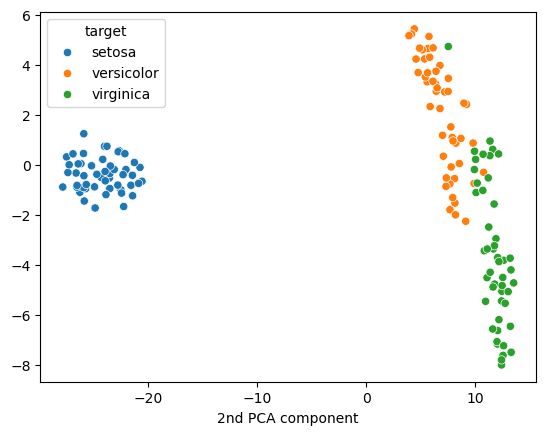

In [17]:
sklearn.manifold

iris_2d_tsne = sklearn.manifold.TSNE(n_components=2).fit_transform(iris_df[iris.feature_names])

sns.scatterplot(x=iris_2d_tsne[:,0], y=iris_2d_tsne[:,1], hue=iris_df.target)
plt.xlabel('1st PCA component')
plt.xlabel('2nd PCA component')

#### Further on embeddings

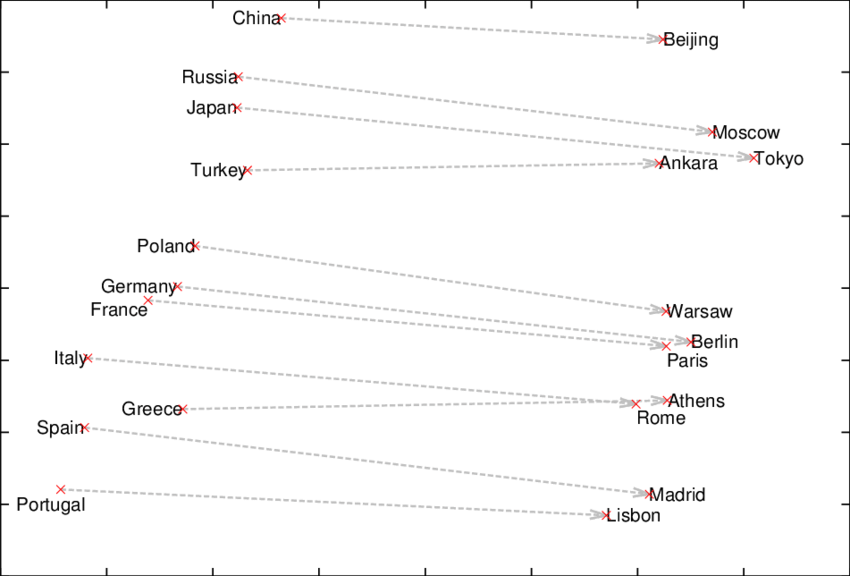
source: https://www.researchgate.net/figure/Two-dimensional-PCA-projection-of-the-1000-dimensional-Skip-gram-vectors-of-countries-and_fig2_257882504

#### Recommendation systems

Very natural and common in practice is the problem of serving recommendations.
In the simplest setup we can think of the data being a bipartite graph between users and movies, with an edge representing the fact that a user have seen a movie, and an edge-weight representing the rating they gave to the movie.
We can see this represantation naturally in a sparse matrix, with many of not most of the entries being empty.

Now the question of the recommendation system is to answer a question:
- for a given user/movie entry, what would be the actual value in this entry of the user would rate this movie?



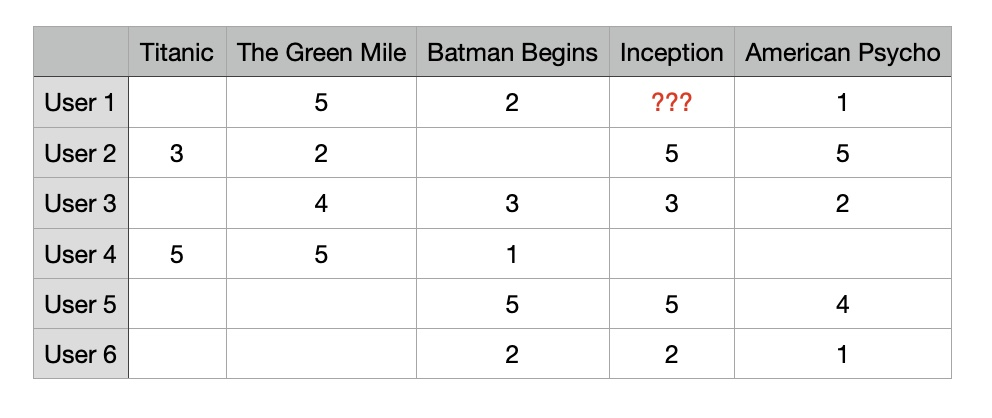

In theory, we could treat it as a supervised task, where we would like to predict --- given ratings Titanic, The Green Mile, Batman Begins, American Psycho --- the rating of the Inception for all users who didn't rate it yet. However, due to the specifics of the data, and the fact that most of the times such matrices are very sparse, the approaches to handle the structure of the matrix/graph are the core of the actual system, and hence, we cannot really look at this as a supervised task. On the other hand, it doesn't seem like an unsupervised task either.

#### Generative models

If we are given a dataset, like images of dogs or all articles on Polish Wikipedia, then a very natural question is whether we can *learn* the dataset so much, that we can generate new images of dogs or produce new phrases in polish Language. Type of models which handle such tasks are called **generative models**. Due to the complexity of such models, we will not be able, to create one during this class. However, it will be absolutely possible for you to create a reasonable generative model after the Neural Network class.
One nice example which just comes from a basic so called Recurrent Neural Network is a simple model which reads a lot of Shakespeare's poems and can output something like that:

<code>
PANDARUS:
Alas, I think he shall be come approached and the day
When little srain would be attain'd into being never fed,
And who is but a chain and subjects of his death,
I should not sleep.
<br/>
Second Senator:
They are away this miseries, produced upon my soul,
Breaking and strongly should be buried, when I perish
The earth and thoughts of many states.
<br/>
DUKE VINCENTIO:
Well, your wit is in the care of side and that.
<br/>
Second Lord:
They would be ruled after this chamber, and
my fair nues begun out of the fact, to be conveyed,
Whose noble souls I'll have the heart of the wars.
<br/>
Clown:
Come, sir, I will make did behold your worship.
<br/>
VIOLA:
I'll drink it.
</code>

source: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

During this class we will discover one generative model, namely, Gaussian Mixtures, although it will not produce results as spectacular as the one above.

## Other kinds of learning

Reinforcement learning complements supervised and unsupervised learning. For instance in bandit problems (named after the one-armed bandit slot machines) the model must discover which actions bring, in expectation, the largest rewards. This is generalized in **reinforcement learning** in which agents learn to execute actions while placed in an environment. E.g. an agent may play a computer game, controlling a character and seeing what is on the game screen. The agent is tasked with maximizing in-game rewards. However, unlike supervised learning, the rewards are stochastic and may depend on whole sequences of actions.

We need to stress that despite sharing the word "learning", reinforcement learning methods are not terribly tangent to what we are going to see in this lecture.